Ce projet vise à prédire les ventes futures à partir de données historiques. L'idée est d'utiliser les techniques de machine learning pour fournir des prédictions plus précises, ce qui peut aider à optimiser la gestion des stocks et à améliorer les stratégies de marketing.

In [1]:
# Import Bibliothèque

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [8]:
# Charger les données
df = pd.read_csv('/content/car_purchasing.csv', encoding='latin-1') # Try 'latin-1' encoding

print(df.head())


     customer name                                    customer e-mail  \
0    Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1    Harlan Barnes                                eu.dolor@diam.co.uk   
2  Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3  Jade Cunningham                            malesuada@dignissim.com   
4     Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   

        country  gender        age  annual Salary  credit card debt  \
0      Bulgaria       0  41.851720    62812.09301      11609.380910   
1        Belize       0  40.870623    66646.89292       9572.957136   
2       Algeria       1  43.152897    53798.55112      11160.355060   
3  Cook Islands       1  58.271369    79370.03798      14426.164850   
4        Brazil       1  57.313749    59729.15130       5358.712177   

     net worth  car purchase amount  
0  238961.2505          35321.45877  
1  530973.9078          45115.52566  
2  638467.1773      

In [11]:
# Nettoyage des données - Supprimer les lignes avec des valeurs manquantes
df = df.dropna()

# Get actual column names containing 'customer name'
customer_name_cols = [col for col in df.columns if 'customer name' in col]

# Drop unnecessary customer name columns if they exist
unwanted_cols = ['customer name_Abigail X. Lindsey', 'customer name_Abra D. Golden',
                 'customer name_Adria Mathis', 'customer name_Adrian Brock']
existing_unwanted_cols = [col for col in unwanted_cols if col in customer_name_cols]
if existing_unwanted_cols:
    df.drop(columns=existing_unwanted_cols, inplace=True)
else:
    print("Warning: Some or all of the specified customer name columns were not found.")

# Supprimer des colonnes de pays ou autres caractéristiques non pertinentes
df.drop(columns=[col for col in df.columns if 'country' in col], inplace=True)

# Encodage des variables catégorielles
df = pd.get_dummies(df, drop_first=True)  # Pour les variables comme 'gender', 'country', etc.

# Vérification des premières lignes après nettoyage
print(df.head())

   gender        age  annual Salary  credit card debt    net worth  \
0       0  41.851720    62812.09301      11609.380910  238961.2505   
1       0  40.870623    66646.89292       9572.957136  530973.9078   
2       1  43.152897    53798.55112      11160.355060  638467.1773   
3       1  58.271369    79370.03798      14426.164850  548599.0524   
4       1  57.313749    59729.15130       5358.712177  560304.0671   

   car purchase amount  customer name_Adrienne  customer name_Adrienne Bolton  \
0          35321.45877                   False                          False   
1          45115.52566                   False                          False   
2          42925.70921                   False                          False   
3          67422.36313                   False                          False   
4          55915.46248                   False                          False   

   customer name_Ahmed Wright  customer name_Aileen  ...  \
0                       False   

In [12]:
# Sélectionner les variables indépendantes (features) et la variable cible
X = df[['age', 'annual Salary', 'credit card debt', 'net worth']]  # Choisir des features pertinentes
y = df['car purchase amount']  # Variable cible

In [13]:
# Diviser les données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluation du modèle (calcul du RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 1.4386814760264848


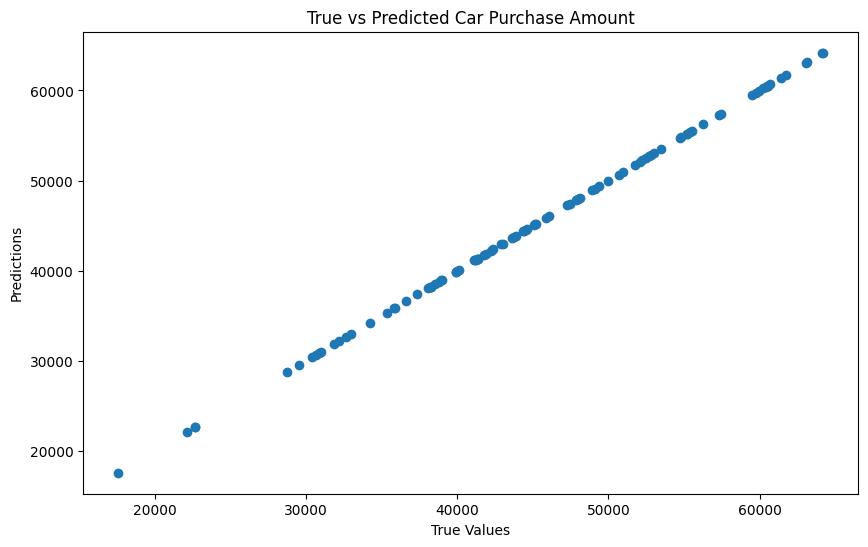

In [15]:
# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Car Purchase Amount')
plt.show()

In [16]:
# Affichage des coefficients du modèle pour interprétation
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Coefficients: [ 8.41562428e+02  5.62334404e-01 -2.42688998e-05  2.89834774e-02]
Intercept: -42147.154623960065
